In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

!pip install pmdarima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.6 MB/s eta 0:00:00


# **Chia train test theo tỉ lệ 8:2**



In [2]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 8:2
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25853.621, Time=4.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25857.213, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25857.846, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25857.878, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25855.500, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25860.920, Time=0.84 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=25861.088, Time=1.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.72 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25853.842, Time=4.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=25859.810, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25861.774, Time=2.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=25861.949, Time=0.94 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25857.689, Time=5.80 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=25852.108, Time=1.87 sec
 ARIMA(1,1,2)(0,0,0)[0]  

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [5]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 15404.43705605976
Testing RMSE: 21724.978827774652
Testing MAPE: 0.5728346778003476


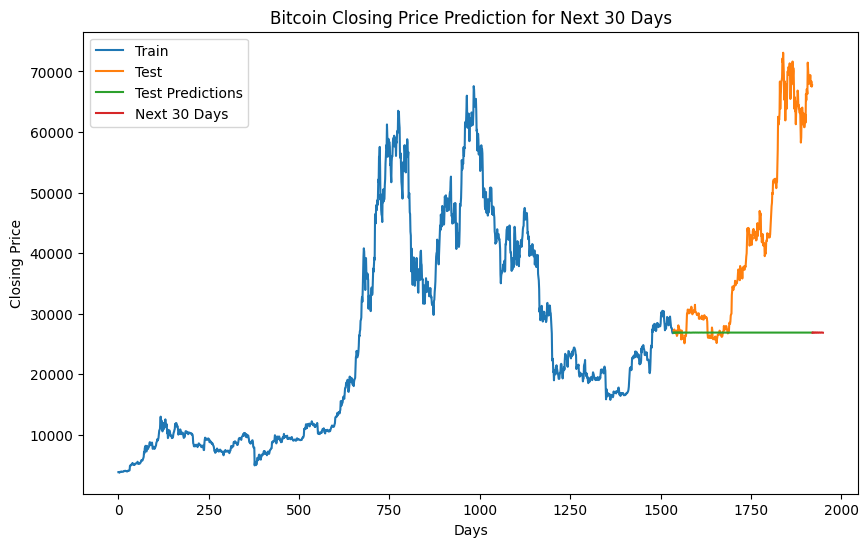

Predicted closing prices for the next 30 days:
[26868.39676808 26835.68465869 26867.67338979 26924.78553913
 26941.36790267 26901.00767349 26852.27190599 26850.4610564
 26895.01305026 26933.23045788 26922.46278931 26877.53933355
 26850.89921991 26871.50445944 26913.55311507 26928.5449775
 26901.11044473 26864.46866402 26860.35826875 26891.60197537
 26921.08643412 26915.73381475 26883.49671892 26862.13702628
 26875.08561282 26905.87234985 26918.86843034 26900.4365272
 26873.05691519 26868.03225252]


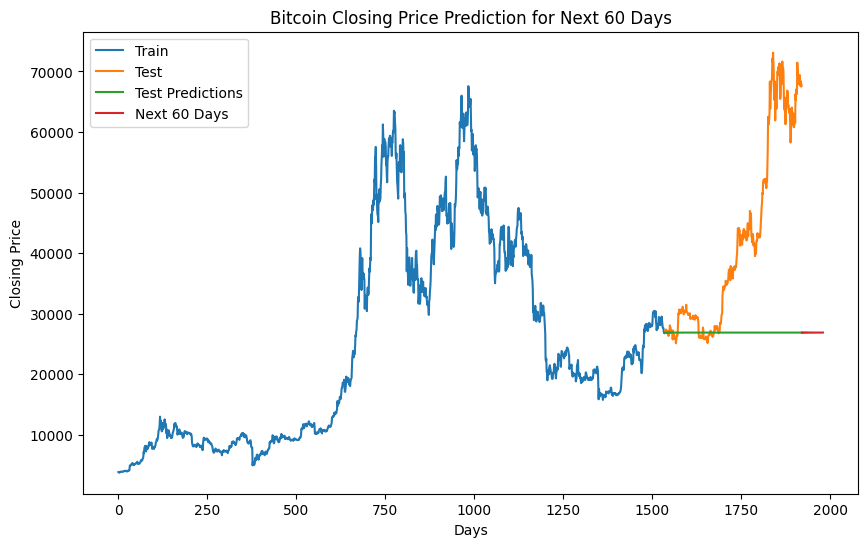

Predicted closing prices for the next 60 days:
[26868.39676808 26835.68465869 26867.67338979 26924.78553913
 26941.36790267 26901.00767349 26852.27190599 26850.4610564
 26895.01305026 26933.23045788 26922.46278931 26877.53933355
 26850.89921991 26871.50445944 26913.55311507 26928.5449775
 26901.11044473 26864.46866402 26860.35826875 26891.60197537
 26921.08643412 26915.73381475 26883.49671892 26862.13702628
 26875.08561282 26905.87234985 26918.86843034 26900.4365272
 26873.05691519 26868.03225252 26889.77773674 26912.34276211
 26910.29223599 26887.29704966 26870.39121987 26878.25948413
 26900.67617175 26911.61252712 26899.39919534 26879.06083457
 26873.93185978 26888.94069701 26906.08409988 26905.95441971
 26889.65448536 26876.42045881 26880.97313875 26897.2045759
 26906.20450534 26898.2470162  26883.22513534 26878.43252817
 26888.69504135 26901.63146943 26902.53788351 26891.06085907
 26880.80013492 26883.23347939 26894.919703   26902.19711103]


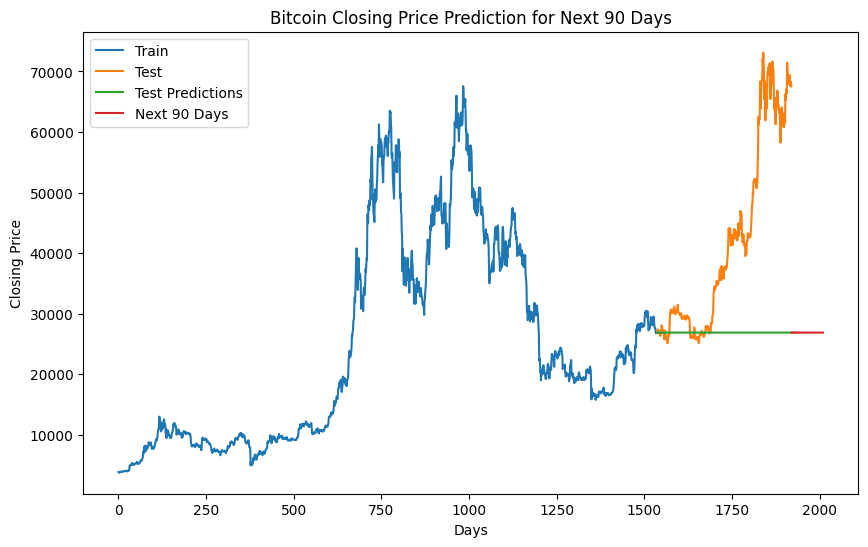

Predicted closing prices for the next 90 days:
[26868.39676808 26835.68465869 26867.67338979 26924.78553913
 26941.36790267 26901.00767349 26852.27190599 26850.4610564
 26895.01305026 26933.23045788 26922.46278931 26877.53933355
 26850.89921991 26871.50445944 26913.55311507 26928.5449775
 26901.11044473 26864.46866402 26860.35826875 26891.60197537
 26921.08643412 26915.73381475 26883.49671892 26862.13702628
 26875.08561282 26905.87234985 26918.86843034 26900.4365272
 26873.05691519 26868.03225252 26889.77773674 26912.34276211
 26910.29223599 26887.29704966 26870.39121987 26878.25948413
 26900.67617175 26911.61252712 26899.39919534 26879.06083457
 26873.93185978 26888.94069701 26906.08409988 26905.95441971
 26889.65448536 26876.42045881 26880.97313875 26897.2045759
 26906.20450534 26898.2470162  26883.22513534 26878.43252817
 26888.69504135 26901.63146943 26902.53788351 26891.06085907
 26880.80013492 26883.23347939 26894.919703   26902.19711103
 26897.1215624  26886.08830166 26881.84177

In [6]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)

# **Chia train test theo tỉ lệ 7:3**

In [7]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 7:3
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22740.997, Time=5.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22747.474, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22748.018, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22748.046, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22745.625, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22751.182, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22751.958, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22744.885, Time=3.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22744.963, Time=5.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22749.998, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22752.178, Time=1.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22752.328, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.66 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=22741.069, Time=1.79 sec

Best model:  ARIMA(2,1,2

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [9]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [10]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 12819.207180024803
Testing RMSE: 18573.255938898914
Testing MAPE: 0.5094735819344731


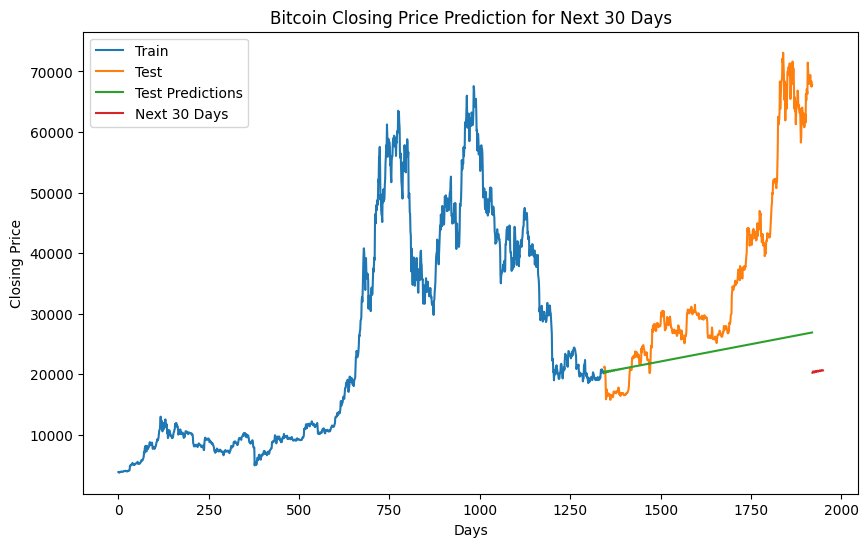

Predicted closing prices for the next 30 days:
[20268.68862542 20408.9414919  20494.80921864 20452.93067059
 20344.33291309 20295.1421927  20364.27556992 20486.63671046
 20546.03456998 20496.61486861 20406.1464109  20380.90186116
 20455.01354461 20559.26609675 20597.16852931 20545.02074584
 20472.41983005 20466.31249791 20541.19679253 20628.008055
 20649.02336264 20597.78258317 20542.04378587 20550.6935773
 20623.24756654 20693.89933964 20702.15868788 20654.43505284
 20614.05634206 20633.59564619]


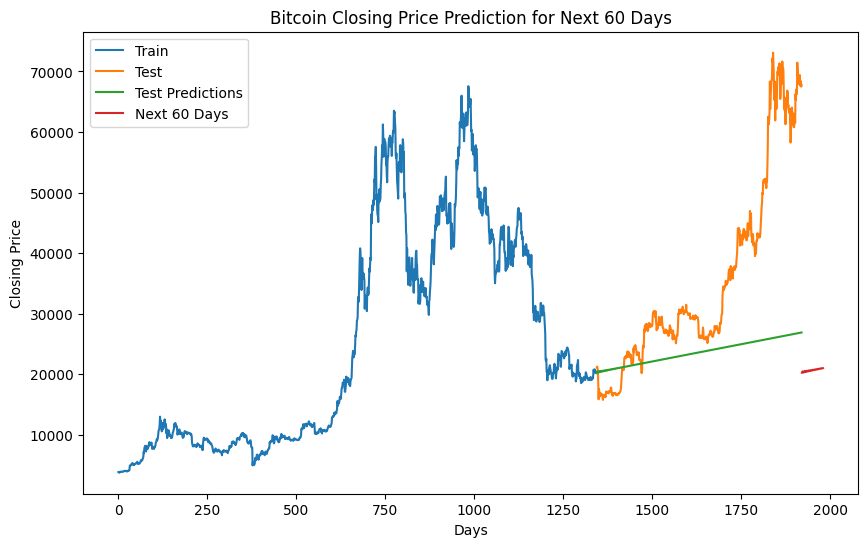

Predicted closing prices for the next 60 days:
[20268.68862542 20408.9414919  20494.80921864 20452.93067059
 20344.33291309 20295.1421927  20364.27556992 20486.63671046
 20546.03456998 20496.61486861 20406.1464109  20380.90186116
 20455.01354461 20559.26609675 20597.16852931 20545.02074584
 20472.41983005 20466.31249791 20541.19679253 20628.008055
 20649.02336264 20597.78258317 20542.04378587 20550.6935773
 20623.24756654 20693.89933964 20702.15868788 20654.43505284
 20614.05634206 20633.59564619 20701.66224338 20757.82612306
 20756.92432738 20714.461383   20687.64696334 20714.75828752
 20776.96863944 20820.52434466 20813.50112879 20777.33083481
 20762.15249691 20794.07084114 20849.69344317 20882.58681371
 20871.93844317 20842.52667551 20837.04752281 20871.53692627
 20920.33851107 20944.47491505 20932.18745624 20909.56594381
 20911.93103683 20947.24335424 20989.36470975 21006.53313823
 20994.12997574 20978.01232776 20986.51106525 21021.33366065]


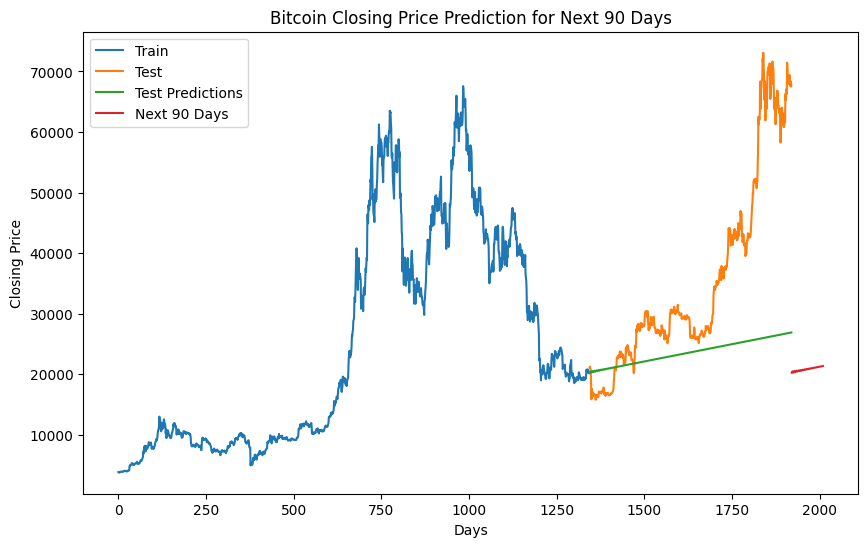

Predicted closing prices for the next 90 days:
[20268.68862542 20408.9414919  20494.80921864 20452.93067059
 20344.33291309 20295.1421927  20364.27556992 20486.63671046
 20546.03456998 20496.61486861 20406.1464109  20380.90186116
 20455.01354461 20559.26609675 20597.16852931 20545.02074584
 20472.41983005 20466.31249791 20541.19679253 20628.008055
 20649.02336264 20597.78258317 20542.04378587 20550.6935773
 20623.24756654 20693.89933964 20702.15868788 20654.43505284
 20614.05634206 20633.59564619 20701.66224338 20757.82612306
 20756.92432738 20714.461383   20687.64696334 20714.75828752
 20776.96863944 20820.52434466 20813.50112879 20777.33083481
 20762.15249691 20794.07084114 20849.69344317 20882.58681371
 20871.93844317 20842.52667551 20837.04752281 20871.53692627
 20920.33851107 20944.47491505 20932.18745624 20909.56594381
 20911.93103683 20947.24335424 20989.36470975 21006.53313823
 20994.12997574 20978.01232776 20986.51106525 21021.33366065
 21057.18199849 21069.00500409 21057.6025

In [11]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)

# **Chia train test theo tỉ lệ 6:4**

In [12]:
# 2. Đọc file dữ liệu tiền mã hóa Bitcoin và chia train test theo tỉ lệ 6:4
df = pd.read_csv('Btc.csv')
df = df[['Close']]
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [13]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Tìm model phù hợp nhất và fit model (Nếu chuỗi không dừng auto_arima sẽ tự xử lý việc lấy sai phân)
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19566.248, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19570.921, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19571.856, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19571.855, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19569.744, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19575.856, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19575.835, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19568.227, Time=2.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19568.305, Time=4.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19573.853, Time=0.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19577.202, Time=1.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19577.286, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19570.355, Time=2.73 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=19565.096, Time=1.75 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [15]:
# 5. Đánh giá độ chính xác
test_mae = mean_absolute_error(y_pred, y_test)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = mean_absolute_percentage_error(y_pred, y_test)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

Testing MAE: 15187.111704875555
Testing RMSE: 16873.65981650199
Testing MAPE: 0.3765530719713032


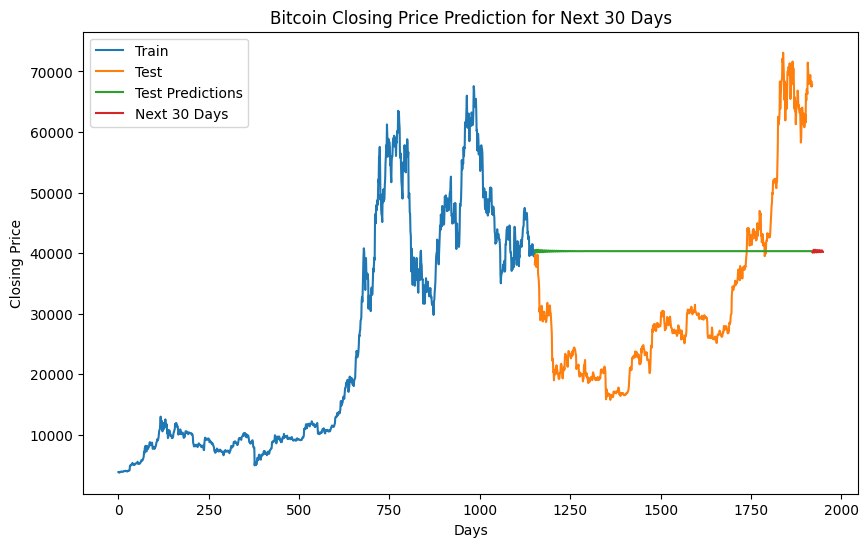

Predicted closing prices for the next 30 days:
[40158.32331024 40067.5057889  40278.94988064 40540.56538185
 40554.94788827 40316.9431077  40106.37370896 40159.57773619
 40404.71685157 40556.62667347 40448.09608976 40213.23420344
 40122.67247873 40272.12124177 40482.22199112 40513.22046772
 40338.16485646 40163.78286714 40186.78402089 40372.37845264
 40503.89481022 40435.37674498 40253.08554122 40167.77942633
 40271.35827209 40438.50415715 40477.79442616 40350.62731528
 40207.92887904 40211.38863433]


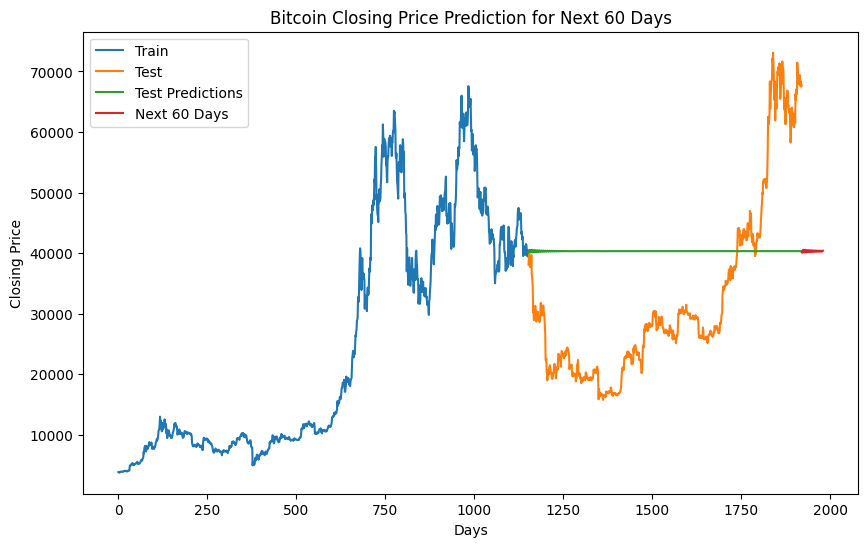

Predicted closing prices for the next 60 days:
[40158.32331024 40067.5057889  40278.94988064 40540.56538185
 40554.94788827 40316.9431077  40106.37370896 40159.57773619
 40404.71685157 40556.62667347 40448.09608976 40213.23420344
 40122.67247873 40272.12124177 40482.22199112 40513.22046772
 40338.16485646 40163.78286714 40186.78402089 40372.37845264
 40503.89481022 40435.37674498 40253.08554122 40167.77942633
 40271.35827209 40438.50415715 40477.79442616 40350.62731528
 40207.92887904 40211.38863433 40350.55762275 40462.34617973
 40421.85943838 40281.59456397 40204.26845474 40274.30260004
 40406.08424454 40448.17054744 40357.09623902 40241.57589515
 40233.03564934 40336.31964918 40429.89374877 40408.62146725
 40301.64576778 40233.49600392 40279.32069214 40382.31562144
 40423.72043176 40359.580042   40266.98514022 40251.6766403
 40327.46452687 40404.7643603  40396.2979018  40315.45810556
 40256.69052885 40285.30890794 40365.11213308 40403.77303438]


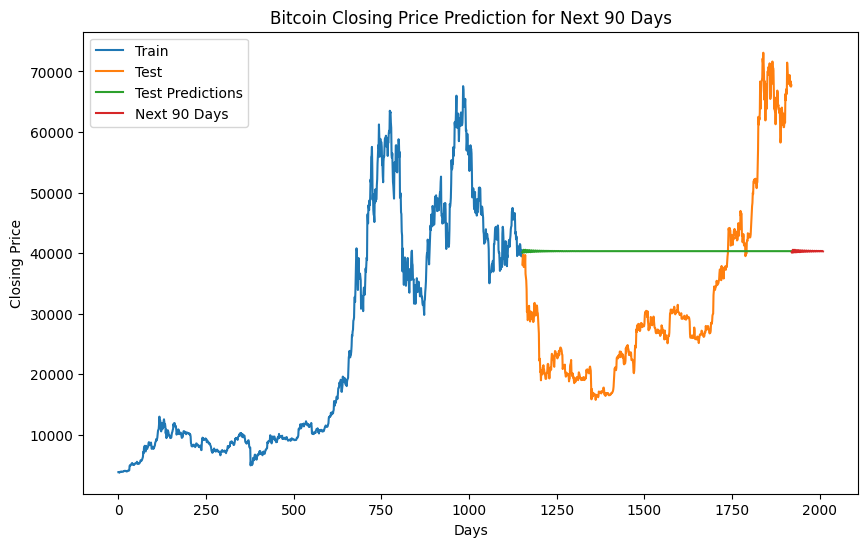

Predicted closing prices for the next 90 days:
[40158.32331024 40067.5057889  40278.94988064 40540.56538185
 40554.94788827 40316.9431077  40106.37370896 40159.57773619
 40404.71685157 40556.62667347 40448.09608976 40213.23420344
 40122.67247873 40272.12124177 40482.22199112 40513.22046772
 40338.16485646 40163.78286714 40186.78402089 40372.37845264
 40503.89481022 40435.37674498 40253.08554122 40167.77942633
 40271.35827209 40438.50415715 40477.79442616 40350.62731528
 40207.92887904 40211.38863433 40350.55762275 40462.34617973
 40421.85943838 40281.59456397 40204.26845474 40274.30260004
 40406.08424454 40448.17054744 40357.09623902 40241.57589515
 40233.03564934 40336.31964918 40429.89374877 40408.62146725
 40301.64576778 40233.49600392 40279.32069214 40382.31562144
 40423.72043176 40359.580042   40266.98514022 40251.6766403
 40327.46452687 40404.7643603  40396.2979018  40315.45810556
 40256.69052885 40285.30890794 40365.11213308 40403.77303438
 40359.51649458 40285.98664902 40267.45

In [16]:
# 6. Dự đoán cho 30, 60, 90 ngày tiếp theo
future_days = [30, 60, 90]
for days in future_days:
    y_future = model.predict(n_periods=days)
    last_index = len(df) - 1
    y_future = pd.Series(y_future, index=range(last_index + 1, last_index + 1 + days))

    # Vẽ hình
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Close'], label='Train')
    plt.plot(test_data.index, test_data['Close'], label='Test')
    plt.plot(test_data.index, y_pred, label='Test Predictions')
    plt.plot(y_future.index, y_future, label=f'Next {days} Days')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.title(f'Bitcoin Closing Price Prediction for Next {days} Days')
    plt.show()

    print(f'Predicted closing prices for the next {days} days:')
    print(y_future.values)